# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [26]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

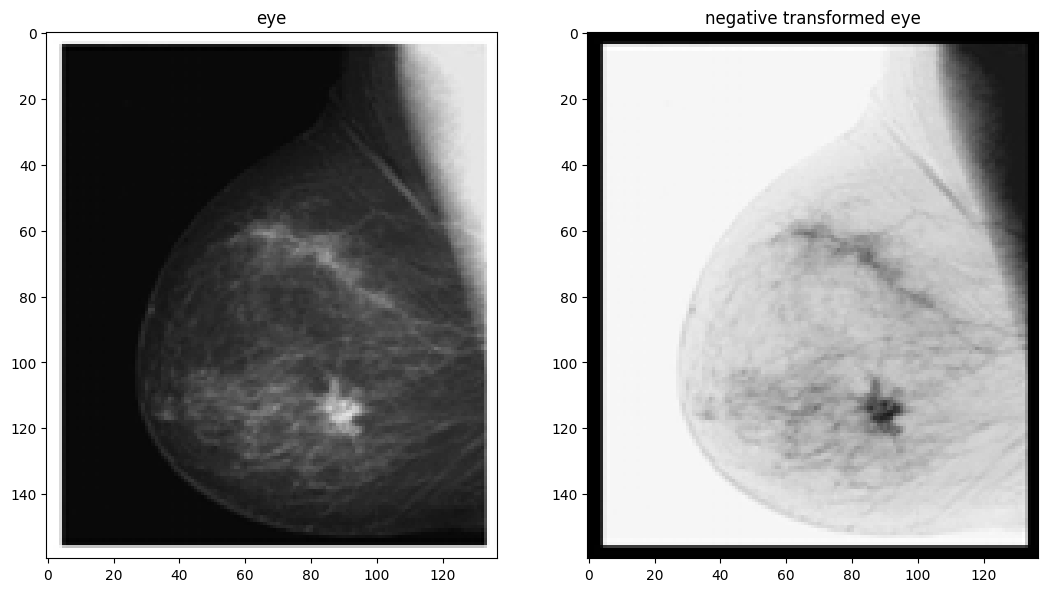

In [28]:
'''
1
Negative Transformation
'''
eye = io.imread('imgs/Picture1.png')
eye = eye[:, :, :3]
eye_gray = rgb2gray(eye)

def Negative(img: np.ndarray) -> np.ndarray:
    return 255 - img

eye_negative = Negative(eye_gray)
show_images([eye_gray, eye_negative], ['eye', 'negative transformed eye'])


(134, 135)


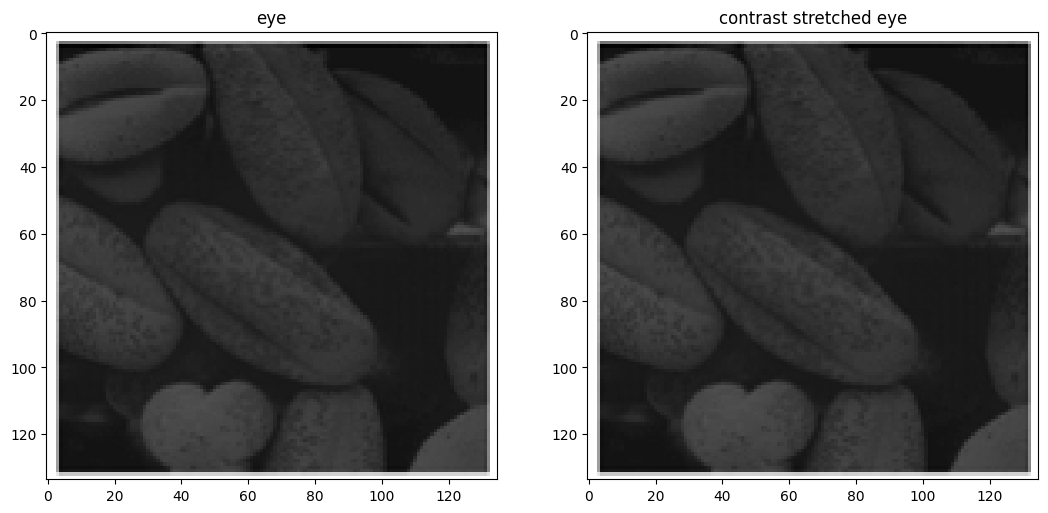

In [29]:
'''
2
Contrast Enhancement
'''
eye = io.imread('imgs/Picture2.png')
eye = eye[:, :, :3]
eye_gray = rgb2gray(eye)

print(eye_gray.shape)

def Contrast_enhanced(img: np.ndarray) -> np.ndarray:
    return np.array([ [(2 * pixel) + 50 if pixel >= 0 and pixel <= 100 else pixel for pixel in row] for row in img ])
    
eye_contrast_stretched = Contrast_enhanced(eye_gray)
show_images([eye_gray, eye_contrast_stretched], ['eye', 'contrast stretched eye'])

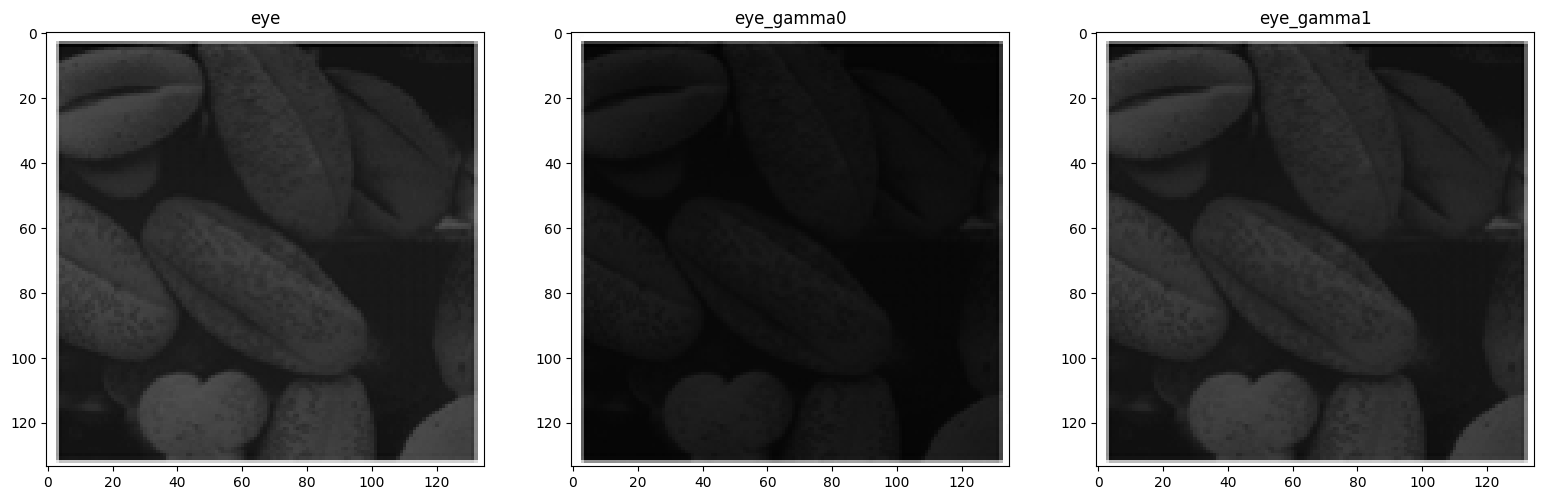

In [30]:
'''
3
Gamma Correction
'''

def Gamma_Correction(img: np.ndarray, c: float, gamma: float) -> np.ndarray:
    return c * np.exp(gamma * img)

eye_gamma0 = Gamma_Correction(eye_gray, 1, 3)
eye_gamma1 = Gamma_Correction(eye_gray, 1, 0.5)
show_images([eye_gray, eye_gamma0, eye_gamma1], ['eye', 'eye_gamma0', 'eye_gamma1'])

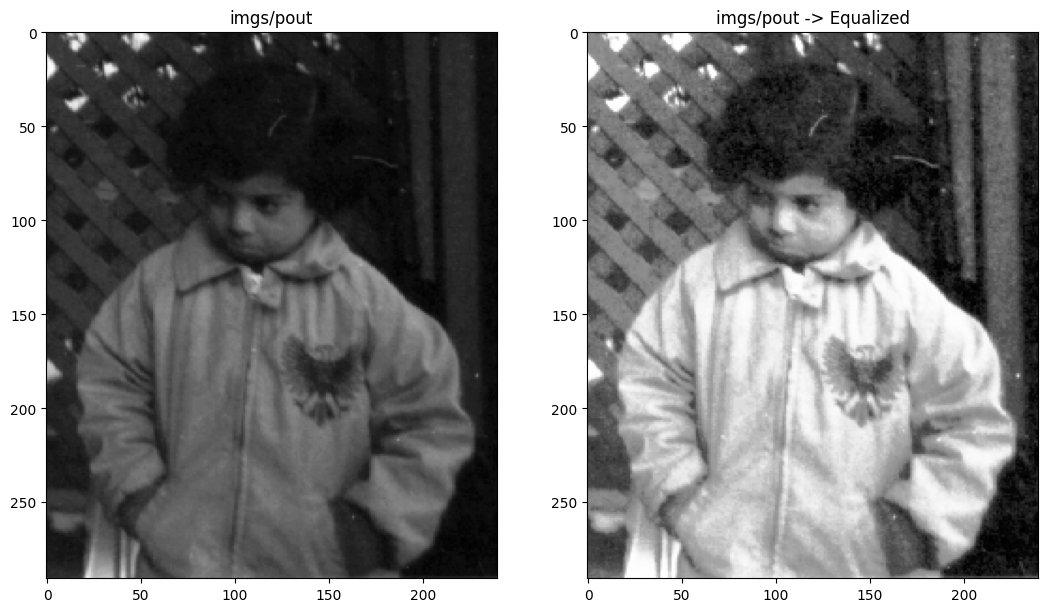

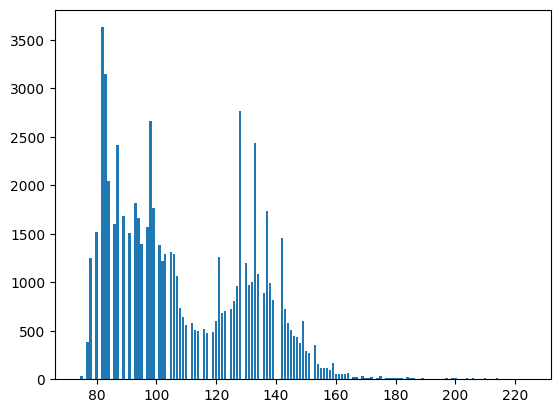

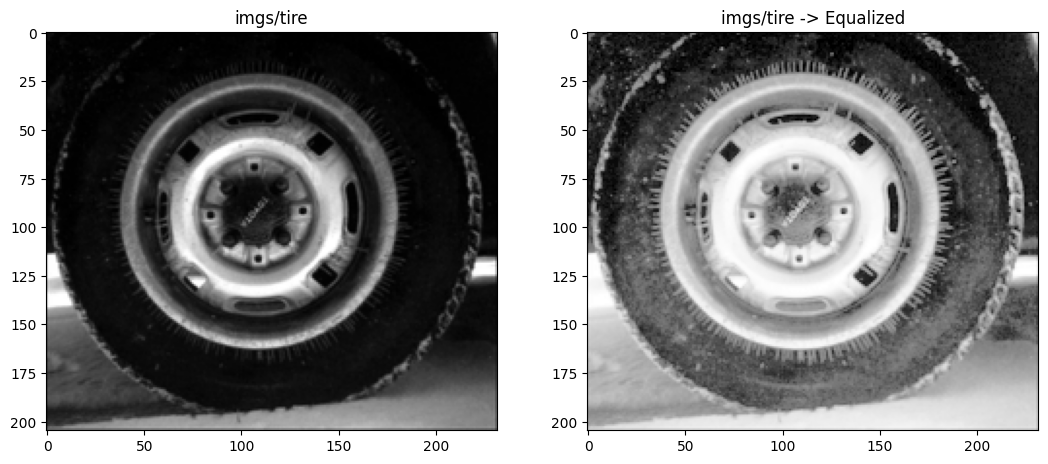

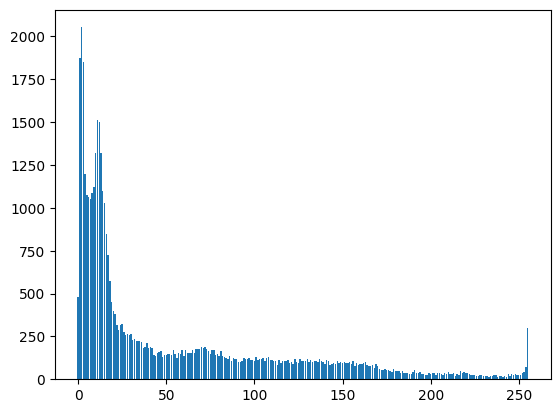

In [41]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
###### Not Sure if this is correct ######
def equalize_histogram_simplified(img: np.ndarray, G=256) -> np.ndarray:
    H = np.zeros(G)
    
    H, _ = np.histogram(img.flatten(), G, [0, G])
    
    H_c = H.cumsum()
    
    N, M = img.shape
    q = np.round((G - 1) * H_c / (N * M)).astype('uint8')
    
    img_equalized = np.zeros_like(img, dtype='uint8')
    for i in range(N):
        for j in range(M):
            img_equalized[i, j] = q[img[i, j]]
    
    return img_equalized

def getImageWithHist(name,ext,nbins=256):
    img = io.imread(name + "." + ext)
    img_equalized = equalize_histogram_simplified(img, nbins)
    show_images([img, img_equalized], [name, name + " -> Equalized"])
    showHist(img)

pout = getImageWithHist('imgs/pout','tif')
tire = getImageWithHist('imgs/tire','tif')